# FSM: SUPERVISED LEARNING- CLASSIFICATION

Implementation of the Naive Bayes and K-Nearest Neighbours algorithms from scratch in Python using Numpy and Pandas

In [1]:
#implementing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Initially, we will do data preprocessing like dropping unnecessary columns, filling all the values and convert the categorical variables into numerical ones.

In [2]:
def preprocess_data(df):
    # Drop unnecessary columns
    df = df.drop(['Ticket', 'Cabin','PassengerId', 'Name'], axis=1)
    
    # Fill missing values with the median for numerical columns
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    
    # Convert categorical variables to numerical labels
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
    
    return df

In [3]:
#Data visualization
def visual_data(df):
    # Separate data by survival labels
    survived_data = df[df['Survived'] == 1]
    deceased_data = df[df['Survived'] == 0]
    
    # Plot age distribution
    plt.hist(survived_data['Age'], bins=30, alpha=0.5, color='blue', label='Survived')
    plt.hist(deceased_data['Age'], bins=30, alpha=0.5, color='red', label='Not Survived')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Age Distribution')
    plt.legend()
    plt.show()

In [4]:
#Loading the data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')
test_data = test_data.merge(gender_submission, on='PassengerId')

In [5]:
train_data  = preprocess_data(train_data)
test_data  = preprocess_data(test_data)

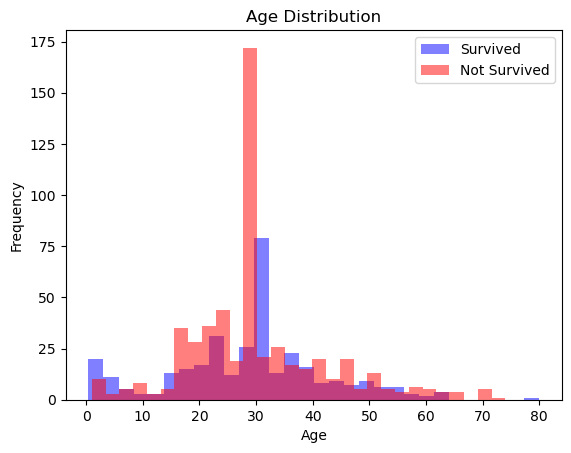

In [6]:
#Visualize
visual_data(train_data)

Implementing the Naive Bayes Classifier

Predicted labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


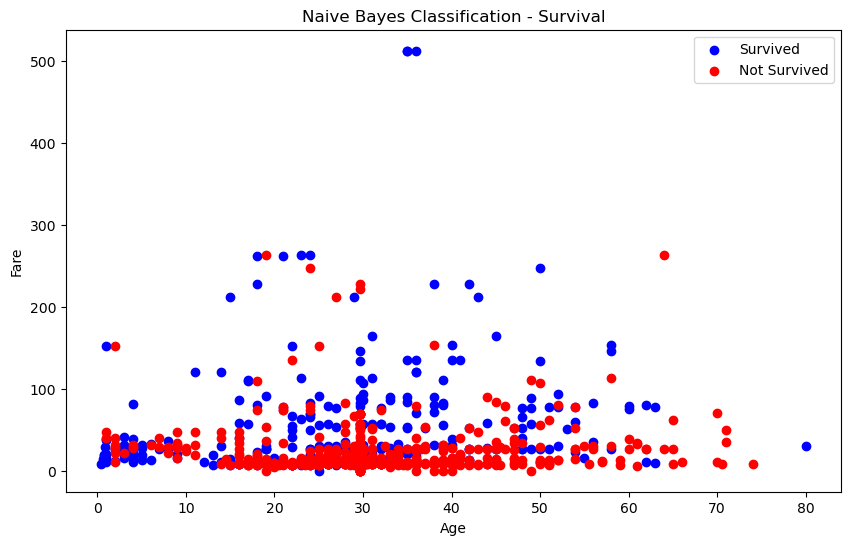

In [7]:
def naive_bayes(x_train, y_train, x_test):
    # Count the number of samples and classes
    num_samples, num_features = x_train.shape
    num_classes = len(np.unique(y_train))
    
    # Compute class probabilities
    class_probab = {}
    for label in np.unique(y_train):
        class_probab[label] = np.sum(y_train == label) / num_samples
    
    # Compute mean and variance for each feature and class
    means = {}
    variances = {}
    for label in np.unique(y_train):
        x_label = x_train[y_train == label]
        means[label] = np.mean(x_label, axis=0)
        variances[label] = np.var(x_label, axis=0)
    
    # Predict the class for test samples
    y_pred = np.zeros(x_test.shape[0], dtype=int) 
    for i in range(x_test.shape[0]):
        max_posterior = -np.inf
        pred_label = None
        for label in np.unique(y_train):
            # Compute the posterior probability
            prior = class_probab[label]
            likelihood = np.prod(
                (1 / np.sqrt(2 * np.pi * variances[label])) *
                np.exp(-0.5 * ((x_test[i] - means[label]) ** 2 / variances[label]))
            )
            posterior = prior * likelihood
            
            # Update the maximum posterior probability
            if posterior > max_posterior:
                max_posterior = posterior
                pred_label = label
        
        y_pred[i] = pred_label
    
    return y_pred



x_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y_train = train_data['Survived'].values
x_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y_true_test = test_data['Survived'].values

# Perform Naive Bayes classification
y_pred = naive_bayes(x_train, y_train, x_test)
print("Predicted labels:", y_pred)

# Visualization
survived_data = train_data[train_data['Survived'] == 1]
not_survived_data = train_data[train_data['Survived'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(survived_data['Age'], survived_data['Fare'], color='blue', label='Survived')
plt.scatter(not_survived_data['Age'], not_survived_data['Fare'], color='red', label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Naive Bayes Classification - Survival')
plt.legend()
plt.show()

In [8]:
y_pred_naive_bayes = naive_bayes(x_train, y_train, x_test)
accuracy_naive_bayes = np.mean(y_pred_naive_bayes == y_true_test)
print("Accuracy of Naive Bayes: ", accuracy_naive_bayes)

Accuracy of Naive Bayes:  0.6363636363636364


Implementing the K Nearest Neighbors Classifier

In [9]:
def knn(x_train, y_train, x_test, k):
    # Count the number of samples
    num_samples_train = x_train.shape[0]
    num_samples_test = x_test.shape[0]
    
    # Calculate distances between training and test samples
    distances = np.zeros((num_samples_test, num_samples_train))
    for i in range(num_samples_test):
        for j in range(num_samples_train):
            distances[i, j] = np.linalg.norm(x_test[i] - x_train[j])
    
    # Find k nearest neighbors for each test sample
    knn_indices = np.argpartition(distances, kth=k, axis=1)[:, :k]
    knn_labels = y_train[knn_indices]
    
    # Predict the class for test samples
    y_pred = np.zeros(num_samples_test, dtype=int)  
    for i in range(num_samples_test):
        unique_labels, counts = np.unique(knn_labels[i], return_counts=True)
        pred_label = unique_labels[np.argmax(counts)]
        y_pred[i] = pred_label
    
    return y_pred



x_train = train_data[['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch', 'Fare']].values
y_train = train_data['Survived'].values
x_test = test_data[['Pclass', 'Sex', 'Age', 'Embarked', 'SibSp', 'Parch', 'Fare']].values

# Set the value of k for KNN
k = 4

# Perform KNN classification
y_pred = knn(x_train, y_train, x_test, k)
print("Predicted labels:", y_pred)

Predicted labels: [0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 1]


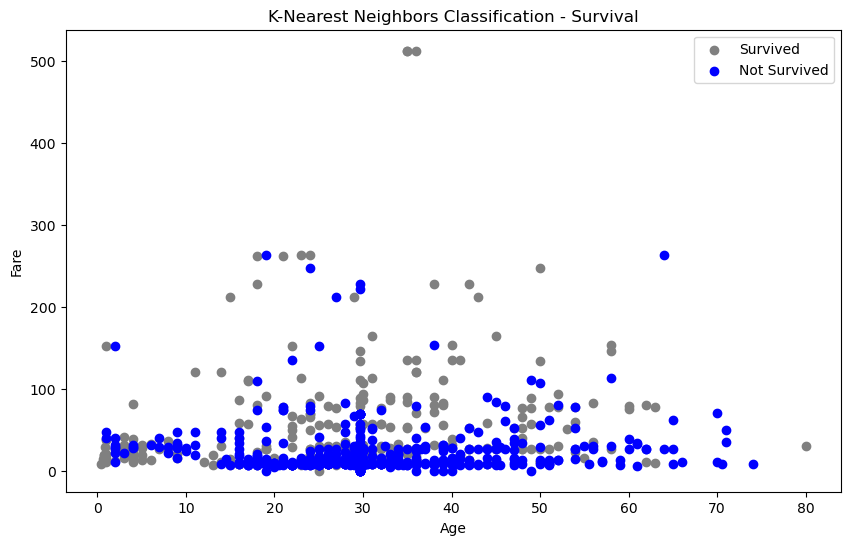

In [10]:
# Visualization
survived_data = train_data[train_data['Survived'] == 1]
not_survived_data = train_data[train_data['Survived'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(survived_data['Age'], survived_data['Fare'], color='grey', label='Survived')
plt.scatter(not_survived_data['Age'], not_survived_data['Fare'], color='blue', label='Not Survived')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('K-Nearest Neighbors Classification - Survival')
plt.show()

In [11]:
y_pred_knn = knn(x_train, y_train, x_test, k)
accuracyKNN = np.mean(y_pred_knn == y_true_test)
print("Accuracy of kNN: ", accuracyKNN)

Accuracy of kNN:  0.6555023923444976
